# 1. Load the data

In [114]:
import pandas as pd
import numpy as np
df_index=pd.read_csv('../emg_gesture_recording_starter_kit/index_finger_data.csv');
df_index

,ch1,ch2,timestamp_ms,label
0,524,493,0,index_finger
1,532,576,10,index_finger
2,488,488,20,index_finger
3,579,538,30,index_finger
4,476,527,40,index_finger
...,...,...,...,...
2995,527,515,29950,index_finger
2996,450,526,29960,index_finger
2997,543,508,29970,index_finger
2998,557,439,29980,index_finger


In [115]:
df_okay=pd.read_csv('../emg_gesture_recording_starter_kit/okay_data.csv');
df_okay

,ch1,ch2,timestamp_ms,label
0,549,518,0,okay
1,557,601,10,okay
2,513,513,20,okay
3,603,563,30,okay
4,501,552,40,okay
...,...,...,...,...
2995,551,540,29950,okay
2996,475,550,29960,okay
2997,568,533,29970,okay
2998,582,464,29980,okay


# 2. Normailze the signal

In [116]:
def normalize(df):
    from sklearn.preprocessing import MinMaxScaler
    scaler=MinMaxScaler();
    
    norm_df=pd.DataFrame(scaler.fit_transform(df[['ch1','ch2']]))
    norm_df.columns=['ch1','ch2']
    norm_df['time']=df['timestamp_ms']
    return norm_df

In [117]:
norm_index=normalize(df_index)
norm_okay=normalize(df_okay)
norm_okay

,ch1,ch2,time
0,0.628571,0.492347,0
1,0.651429,0.704082,10
2,0.525714,0.479592,20
3,0.782857,0.607143,30
4,0.491429,0.579082,40
...,...,...,...
2995,0.634286,0.548469,29950
2996,0.417143,0.573980,29960
2997,0.682857,0.530612,29970
2998,0.722857,0.354592,29980


# 3. Segmenting the signal

In [118]:
def mean_sq(arr):
    ms=0
    for i in arr:
        ms+=(i**2)
    return ms/len(arr)

In [119]:
def extract(df,window_size=100,step_size=10):
    new_df=pd.DataFrame({
    'time':[],
    'rms_ch1':[],
    'rms_ch2':[],
    'mav_ch1':[],
    'mav_ch2':[],
    'mse_ch1':[],
    'mse_ch2':[],
    })

    n=len(df)
    for i in range(0,n-window_size+1,step_size):
        ch1=df['ch1'][i:i+window_size] # to access only 100 elements of ch1 at a time
        ch2=df['ch2'][i:i+window_size]
        
        row={
        'mse_ch1':[mean_sq(ch1)],
        'mse_ch2':[mean_sq(ch2)],
        'mav_ch1':[np.mean(ch1)],
        'mav_ch2':[np.mean(ch2)],
        'time':[np.mean(df['time'][i:i+window_size])]}
        
        row['rms_ch1']=np.sqrt(row['mse_ch1'])
        row['rms_ch2']=np.sqrt(row['mse_ch2'])
        
        new_df=pd.concat([new_df,pd.DataFrame(row)],ignore_index=True)
        
    return new_df

# 4. Extracting features

In [120]:
new_index=extract(norm_index)
new_index['label']=np.full(len(new_index),'index_finger')
new_index

,time,rms_ch1,rms_ch2,mav_ch1,mav_ch2,mse_ch1,mse_ch2,label
0,495.0,0.498656,0.503828,0.484162,0.486466,0.248658,0.253843,index_finger
1,595.0,0.504775,0.519183,0.490810,0.500707,0.254798,0.269551,index_finger
2,695.0,0.512197,0.523549,0.496564,0.505864,0.262346,0.274103,index_finger
3,795.0,0.518942,0.527098,0.501425,0.510079,0.269300,0.277833,index_finger
4,895.0,0.524789,0.518799,0.505726,0.502513,0.275403,0.269152,index_finger
...,...,...,...,...,...,...,...,...
286,29095.0,0.508083,0.479462,0.484609,0.459607,0.258148,0.229884,index_finger
287,29195.0,0.518713,0.474753,0.494274,0.453639,0.269063,0.225391,index_finger
288,29295.0,0.512152,0.486421,0.487402,0.464424,0.262299,0.236606,index_finger
289,29395.0,0.513075,0.491316,0.488268,0.468141,0.263246,0.241391,index_finger


In [121]:
new_okay=extract(norm_okay)
new_okay['label']=np.full(len(new_okay),'okay')
new_okay

,time,rms_ch1,rms_ch2,mav_ch1,mav_ch2,mse_ch1,mse_ch2,label
0,495.0,0.555074,0.528166,0.541571,0.512704,0.308108,0.278960,okay
1,595.0,0.558605,0.540518,0.545571,0.524056,0.312040,0.292159,okay
2,695.0,0.563393,0.542613,0.548686,0.526556,0.317412,0.294429,okay
3,795.0,0.567400,0.543769,0.550857,0.528214,0.321943,0.295685,okay
4,895.0,0.570603,0.533449,0.552400,0.518342,0.325587,0.284568,okay
...,...,...,...,...,...,...,...,...
286,29095.0,0.553018,0.494714,0.530629,0.476658,0.305829,0.244742,okay
287,29195.0,0.566763,0.492584,0.543400,0.473367,0.321220,0.242639,okay
288,29295.0,0.562617,0.506435,0.539171,0.486403,0.316537,0.256476,okay
289,29395.0,0.566618,0.513506,0.542829,0.492577,0.321056,0.263688,okay


In [122]:
import matplotlib.pyplot as plt
def draw(df):
    for i in df.columns:
        if i!='time' and i!='label':
            plt.plot(df['time'],df[i],label=i)
    plt.legend()
    plt.title(df['label'][0])
    plt.show()


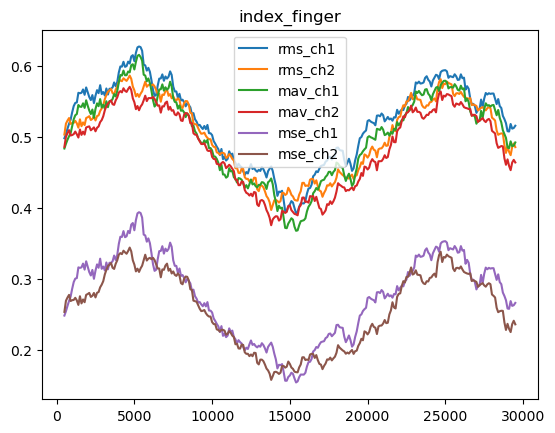

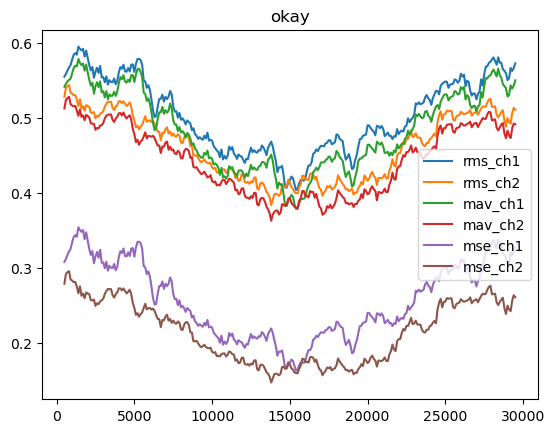

In [123]:

draw(new_index)
draw(new_okay)

# 5. Save the Features

In [124]:
new_index.to_csv('features_index_finger.csv',index=False)
new_okay.to_csv('features_okay.csv',index=False)